# **Importing the libraries**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer

# **Load Dataset**

In [ ]:
# Load Dataset
data = pd.read_csv('/content/car_evaluation.csv')
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
# Dimensions of the Dataset
data.shape

(1727, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
data.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

# **Giving columns their column name**

In [131]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# **View the feature scores**

In [133]:
# view the feature scores
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

2    0.359437
4    0.309424
0    0.146536
1    0.135547
3    0.049057
dtype: float64


# **Use LabelEncoder encoder to transform categorical features into numerical features**

**After using encoder**   

**buying :**   
vhigh = 3   , high = 2  , med = 1    , low = 0   

**maint :**   
vhigh = 3   , high = 2  , med = 1    , low = 0

**doors :**  
2 = 0, 3 = 1, 4 =  2, 5more = 3  

**persons :**   
2 = 0, 4 = 1, more = 2

**lug_boot :**    
small = 2, mid = 1, big = 0

**safety :**   
high = 0, mid = 2, low = 1

**class :**   
acc = 0, good = 1, unacc = 2, vgood = 3






In [ ]:
# Use LabelEncoder encoder to transform categorical features into numerical features
label = LabelEncoder()
data['buying'] = label.fit_transform(data['buying'])
data['maint'] = label.fit_transform(data['maint'])
data['lug_boot'] = label.fit_transform(data['lug_boot'])
data['safety'] = label.fit_transform(data['safety'])
data['class'] = label.fit_transform(data['class'])
data['doors'] = label.fit_transform(data['doors'])
data['persons'] = label.fit_transform(data['persons'])
data

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


# **Slicing data**

In [ ]:
# Slicing data
X = data.iloc[:, [0, 2]].values
y = data.iloc[:, -1].values
data

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


# **Declare feature vector and target variable and droping `'person'` for more accuracy.**

In [149]:
# declare feature vector and target variable
X = data.drop(['persons'], axis=1)
y = data['class']

# **Split the data into tarin and test**

In [150]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print(f"Shape train features :{X_train.shape}")
print(f"Shape train labels :{y_train.shape}")
print(f"Shape test features :{X_test.shape}")
print(f"Shape test labels :{y_test.shape}")

Shape train features :(1381, 6)
Shape train labels :(1381,)
Shape test features :(346, 6)
Shape test labels :(346,)


# **Encode categorical variables with ordinal encoding**

In [151]:
# encode categorical variables with ordinal encoding
encoder = OrdinalEncoder()
#encoder = OrdinalEncoder(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = encoder.transform(X_test)
X_test = pd.DataFrame(X_test)

# **Instantiate the DecisionTreeClassifier model**

In [152]:
# Instantiate the DecisionTreeClassifier model
model = RandomForestClassifier(criterion='log_loss',random_state=0,n_estimators=10,max_depth=5)
model.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
model

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=10,
                       random_state=0)

# **Let check the accuracy**

In [153]:
#Let check the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Train accuracy
y_train_predict = model.predict(X_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

# Test accuracy
y_test_predict = model.predict(X_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y_test,y_test_predict)*100))

Accuracy: 0.9739884393063584
Model accuracy for training data : 97.83%
Model accuracy for validation data : 97.40%


# **Declare feature vector and target variable**

In [155]:
# declare feature vector and target variable
X = data.drop(['persons'], axis=1)
y = data['class']

# **Split the data into training and test sets for BernoulliNB**

In [156]:
#Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# **Encode categorical variables with ordinal encoding**

In [157]:
# Encode categorical variables with ordinal encoding
encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = encoder.transform(X_test)
X_test = pd.DataFrame(X_test)

# **Training the Naive Bayes model of BernoulliNB training set**

In [158]:
# Training the Naive Bayes model on the Training set
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

# **Predicting the Test set results**

In [159]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print("Predicted Test Results : \n",y_pred)

Predicted Test Results : 
 [0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0 2 2
 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2
 2 2 0 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0
 2 2 0 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 0 0 2 2 0 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 0 0 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 0 0 0 0 2 2 0 2 0 2 2 2 2 2 2 0 0 2 2 2 0
 2 2 0 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 0 2 2
 2 0 2 2 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2
 0 2 2 2 2 2 0 2 2 0 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2
 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 2 0 2 2 2 0 0 2 2 2 2 2 0 2 2 

# **Making the Confusion Matrix**

In [160]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
print("Model Accuracy : ",ac)
print("Model Accuracy in %: ",ac*100,"%")
model_score = model.score(X_test, y_test)
print('Model Score : ',model_score)
print('Model Score in %: ',model_score*100,"%")
cm = confusion_matrix(y_test, y_pred)
print("Model Confusion Matrix : ")
print(cm)

Model Accuracy :  0.9210019267822736
Model Accuracy in %:  92.10019267822736 %
Model Score :  0.9845857418111753
Model Score in %:  98.45857418111753 %
Model Confusion Matrix : 
[[108   0   0   0]
 [  0   0  21   0]
 [  0   0 370   0]
 [  0   0  20   0]]


# **Get the confusion matrix**

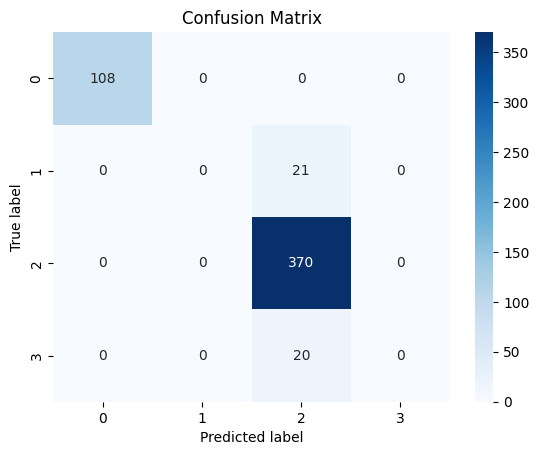

In [161]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()